# 1. Import Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot
from tqdm.auto import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

training_variables = util.training_variables
columns = util.all_relevant_variables #+ ['__MCDecayString__',]

Welcome to JupyROOT 6.26/14


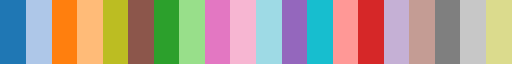

In [2]:
util.my_cmap

In [3]:
# MC_cc = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_200fb_control/*_withDecayString.root:B0'],
#                           library="np",
#                           #cut = '(D_M>1.855) & (D_M<1.885)',
#                           filter_branch=lambda branch: branch.name in columns)
# df_mc_cc = pd.DataFrame(MC_cc)
# df_mc_cc.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
# df_mc_cc.eval(f'p_D_l = D_CMS_p + ell_CMS_p', inplace=True)
# BDT_sig='signal_prob==largest_prob and signal_prob>0.8 and fakeB_prob<0.04 and fakeD_prob<0.05'
# df_mc_cc_BDT_sig = util.apply_mva_bcs(df_mc_cc, training_variables, BDT_sig)
# samples_sig = util.get_dataframe_samples_new(df_mc_cc_BDT_sig, 'e', template=False)

In [10]:
# cc = samples_sig['bkg_combinatorial'].query('ell_genMotherPDG * D_genMotherPDG==411*511')
# print(cc['__MCDecayString__'].iloc[4])

Content of MCParticle list
╰── Upsilon(4S) (300553)
    ├── B0 (511)
    │   ├── D- (-411)
    │   │   ├── K0 (311)
    │   │   │   ╰── K_L0 (130)
    │   │   │       ├╶╶ pi- (-211)
    │   │   │       ├╶╶ pi+ (211)
    │   │   │       │   ├╶╶ nu_mu (14)
    │   │   │       │   ├╶╶ mu+ (-13)
    │   │   │       │   │   ├╶╶ anti-nu_mu (-14)
    │   │   │       │   │   ├╶╶ nu_e (12)
    │   │   │       │   │   ╰╶╶ e+ (-11)
    │   │   │       │   ╰╶╶ e- (11)
    │   │   │       ╰╶╶ n0 (2112)
    │   │   ├── e- (11)
    │   │   │   ╰╶╶ gamma (22)
    │   │   ├── anti-nu_e (-12)
    │   │   ╰── gamma (22)
    │   ├── pi+ (211)
    │   │   ├╶╶ nu_mu (14)
    │   │   ╰╶╶ mu+ (-13)
    │   │       ├╶╶ anti-nu_mu (-14)
    │   │       ├╶╶ nu_e (12)
    │   │       ╰╶╶ e+ (-11)
    │   ├── rho+ (213)
    │   │   ├── pi+ (211)
    │   │   │   ╰╶╶ pi- (-211)
    │   │   ╰── pi0 (111)
    │   │       ├── gamma (22)
    │   │       ╰── gamma (22)
    │   │           ╰╶╶ gamma (22)
    │   ├── eta (

In [2]:
# 4S wrong charge Data vs MC, and MC wc vs cc

cut = '(5<B0_roeMbc_my_mask) & (-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# Load data files
MC_cc = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_200fb_control/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

MC_wc = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_wrongCharge_200fb/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_wc = uproot.concatenate([f'../../Samples/Data/e_channel/proc13_4S_wc_quaxo_2.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_cc = pd.DataFrame(MC_cc)
df_mc_wc = pd.DataFrame(MC_wc)
df_data_wc = pd.DataFrame(data_wc)

In [3]:
lgb_tight = 'sig_prob==largest_prob and sig_prob>0.6 and fakeD_prob<0.05'
ag_tight = 'sig_prob==largest_prob and sig_prob>0.8 and fakeD_prob<0.05'
MVA_all = 'sig_prob>0'

In [4]:
for df in [df_mc_cc, df_mc_wc, df_data_wc,]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval(f'p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

In [ ]:
# # ag + BCS
# df_mc_cc_ag = util.apply_mva_bcs(df_mc_cc, training_variables, ag_tight, 
#                                   library='ag',version='ag-20241201_221125')
# df_mc_wc_ag = util.apply_mva_bcs(df_mc_wc, training_variables, ag_tight, 
#                                   library='ag',version='ag-20241201_221125')
# df_data_wc_ag = util.apply_mva_bcs(df_data_wc, training_variables, ag_tight, 
#                                     library='ag',version='ag-20241201_221125')

In [5]:
# lgb + BCS
df_mc_cc_lgb = util.apply_mva_bcs(df_mc_cc, training_variables, lgb_tight, library='lgbm')
df_mc_wc_lgb = util.apply_mva_bcs(df_mc_wc, training_variables, lgb_tight, library='lgbm')
df_data_wc_lgb = util.apply_mva_bcs(df_data_wc, training_variables, lgb_tight, library='lgbm')

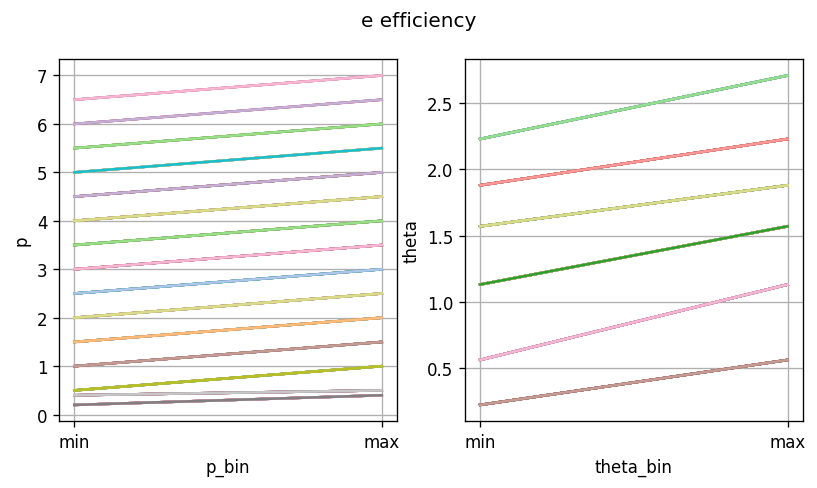

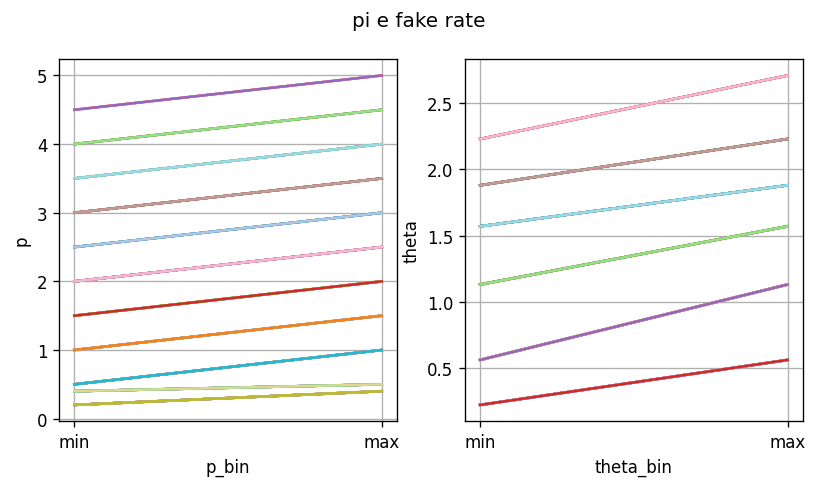

In [22]:
# PID corrections, get tables
pid = util.PID_corrections()
exclude_e_bins_query = "not (p_min == 0.2 and p_max == 5.0) \
and not (theta_min == 0.22 and theta_max == 2.71) \
and not (theta_min == 0.56 and theta_max == 2.23)"
e_eff, e_fake = pid.get_lepton_tables(lepton='e', var="pidChargedBDTScore_e",
                          thres=0.9, exclude_bins=exclude_e_bins_query)
K_eff, K_fake = pid.get_hadron_tables(new_table=False, hadron='K', var='kaonIDNN', thres=0.9)

Required variables: ['ell_theta', 'ell_p', 'ell_charge', 'ell_PDG', 'ell_mcPDG']
Coverage:
PID ell: 97.1%
Required variables: ['D_K_p', 'D_K_cosTheta', 'D_K_charge', 'D_K_PDG', 'D_K_mcPDG']
Coverage:
PID D_K: 98.3%
Required variables: ['ell_theta', 'ell_p', 'ell_charge', 'ell_PDG', 'ell_mcPDG']


/tmp/ipykernel_1529503/2130051682.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PIDWeight'] = df[['ell_Weight', 'D_K_Weight']].product(axis=1)


Coverage:
PID ell: 92.1%
Required variables: ['D_K_p', 'D_K_cosTheta', 'D_K_charge', 'D_K_PDG', 'D_K_mcPDG']
Coverage:
PID D_K: 94.0%


/tmp/ipykernel_1529503/2130051682.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PIDWeight'] = df[['ell_Weight', 'D_K_Weight']].product(axis=1)


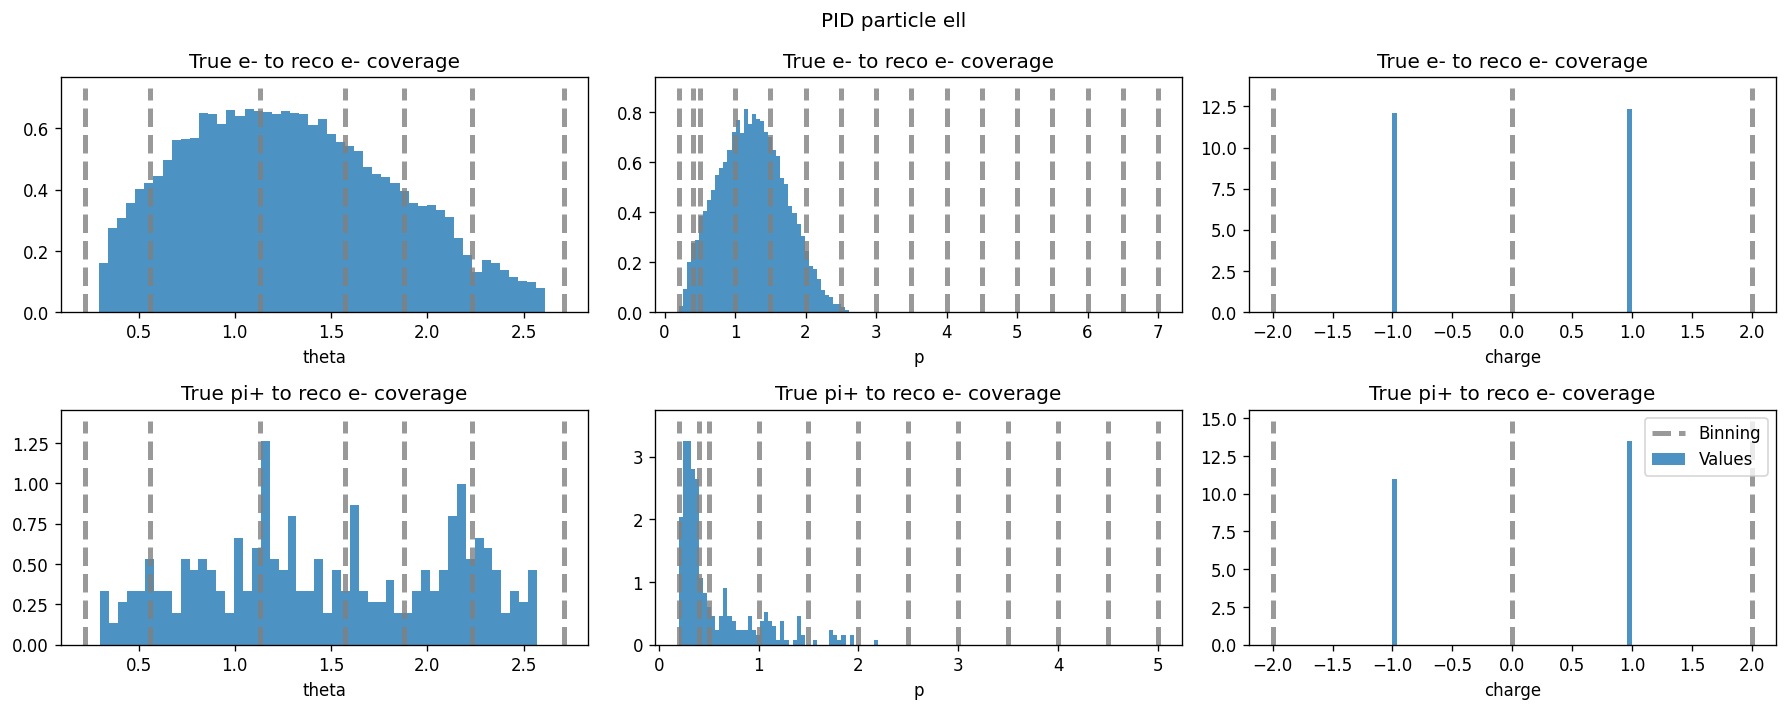

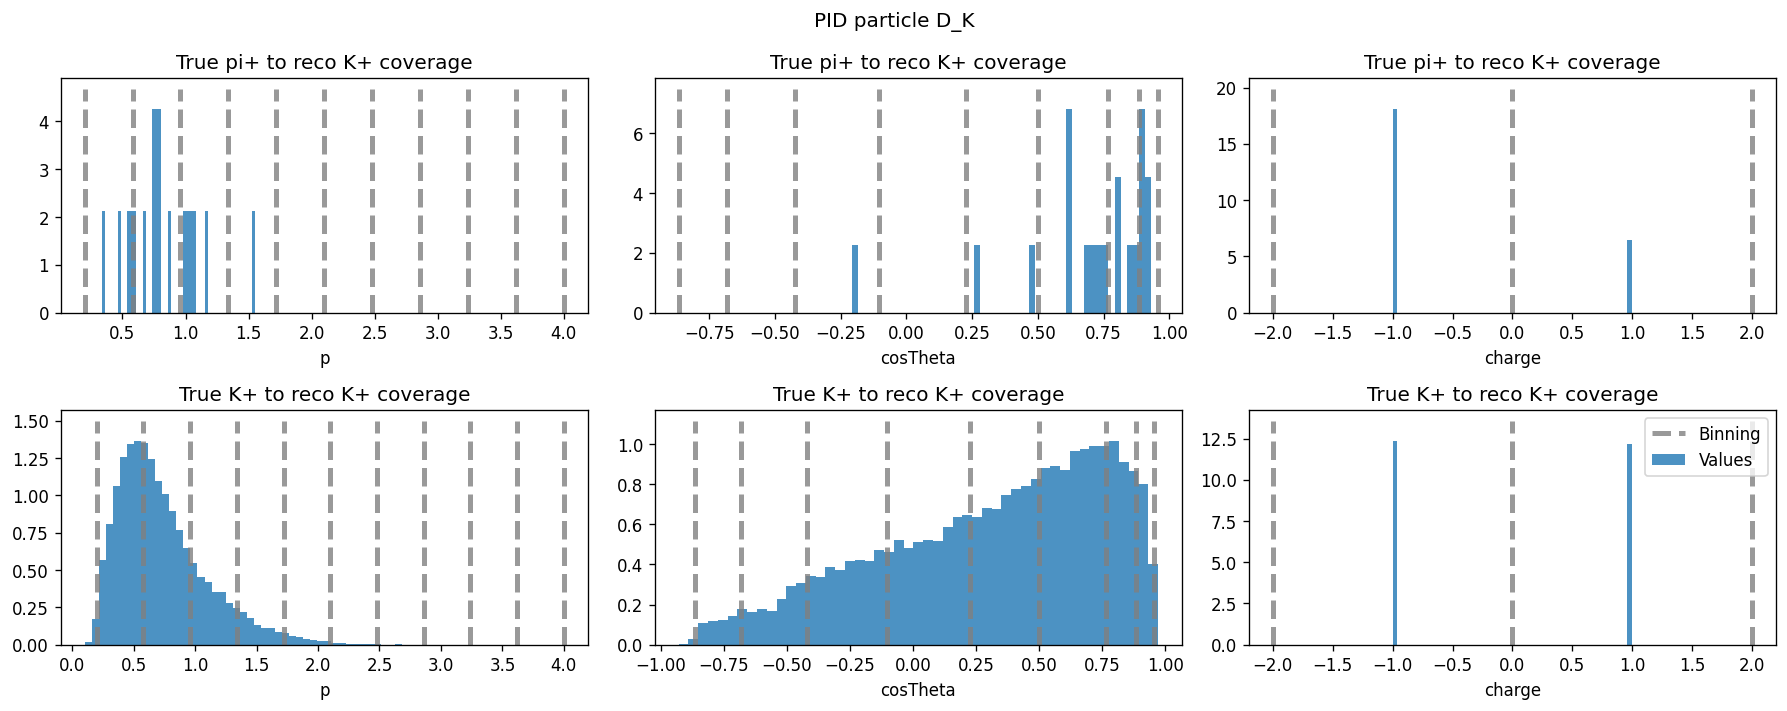

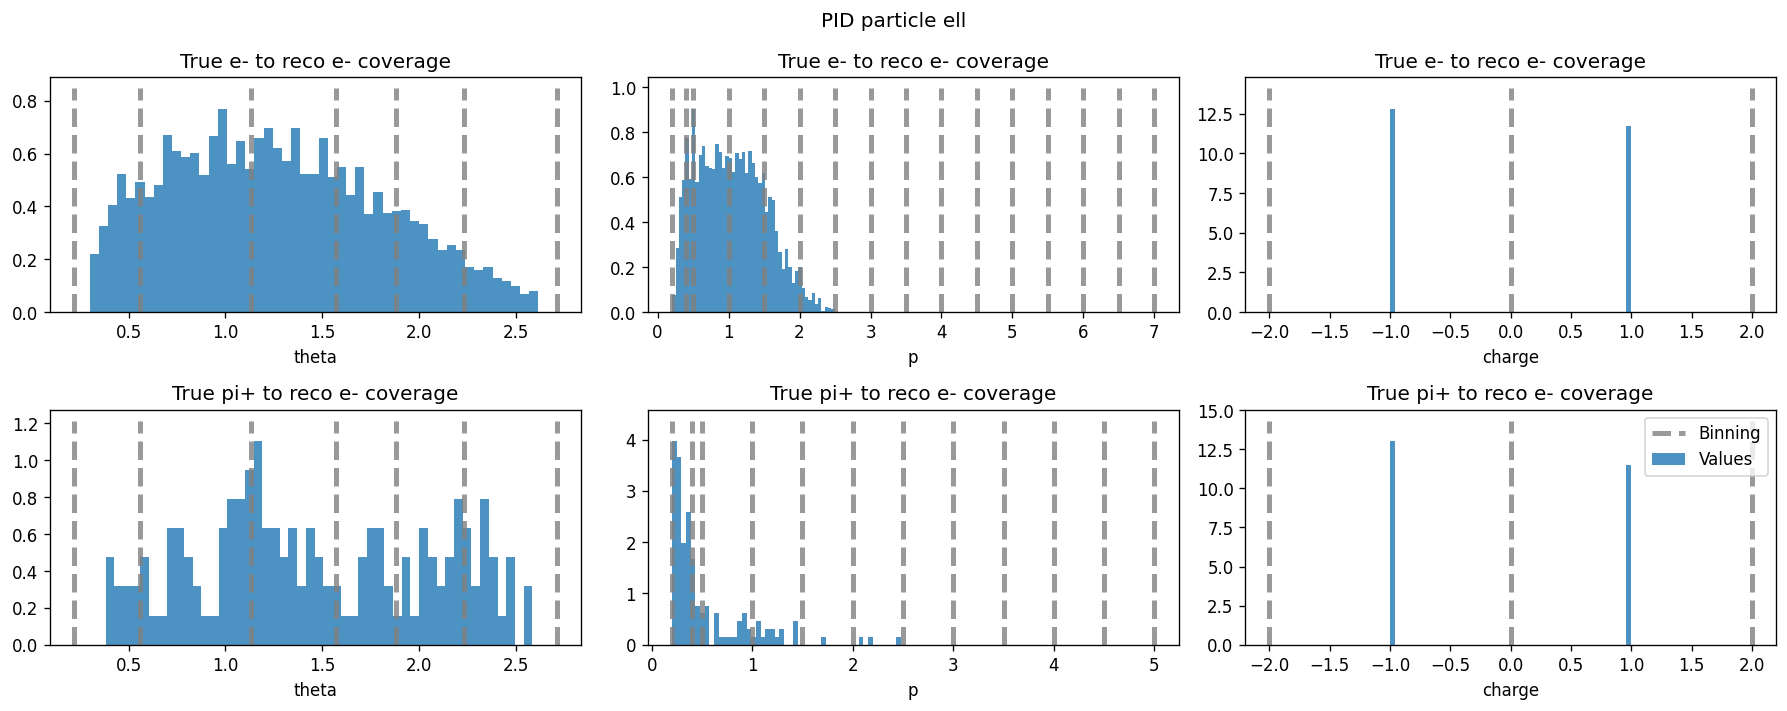

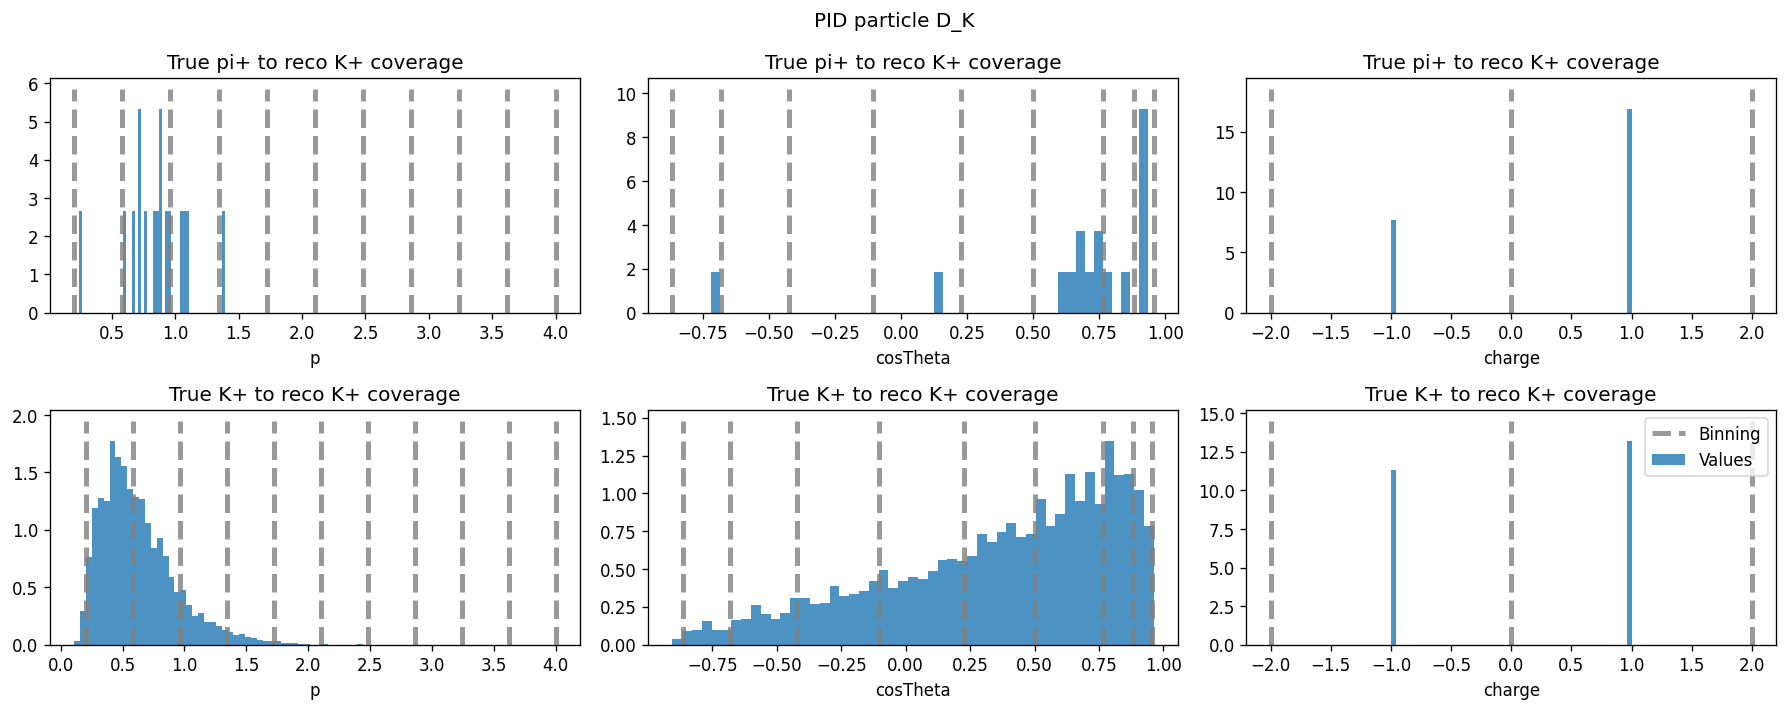

In [23]:
# Apply PID corrections
for df in [df_mc_cc_ag, df_mc_wc_ag]:
    pid.apply_corrections(eff_table=e_eff, fake_table=e_fake, df=df, plots=True,
                          p='e', var='pidChargedBDTScore_e', thres=0.9)
    pid.apply_corrections(eff_table=K_eff, fake_table=K_fake, df=df, plots=True,
                          p='K', var='kaonIDNN', thres=0.9)
    df['PIDWeight'] = df[['ell_Weight', 'D_K_Weight']].product(axis=1)
    df = df.copy()

In [4]:
# df_mc_BDT_combi = util.apply_mva_bcs(df_mc, training_variables, BDT_combinatorial)
# df_data_BDT_combi = util.apply_mva_bcs(df_data, training_variables, BDT_combinatorial)

# df_mc_BDT_no_sig = util.apply_mva_bcs(df_mc, training_variables, BDT_no_sig)
# df_data_BDT_no_sig = util.apply_mva_bcs(df_data, training_variables, BDT_no_sig)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


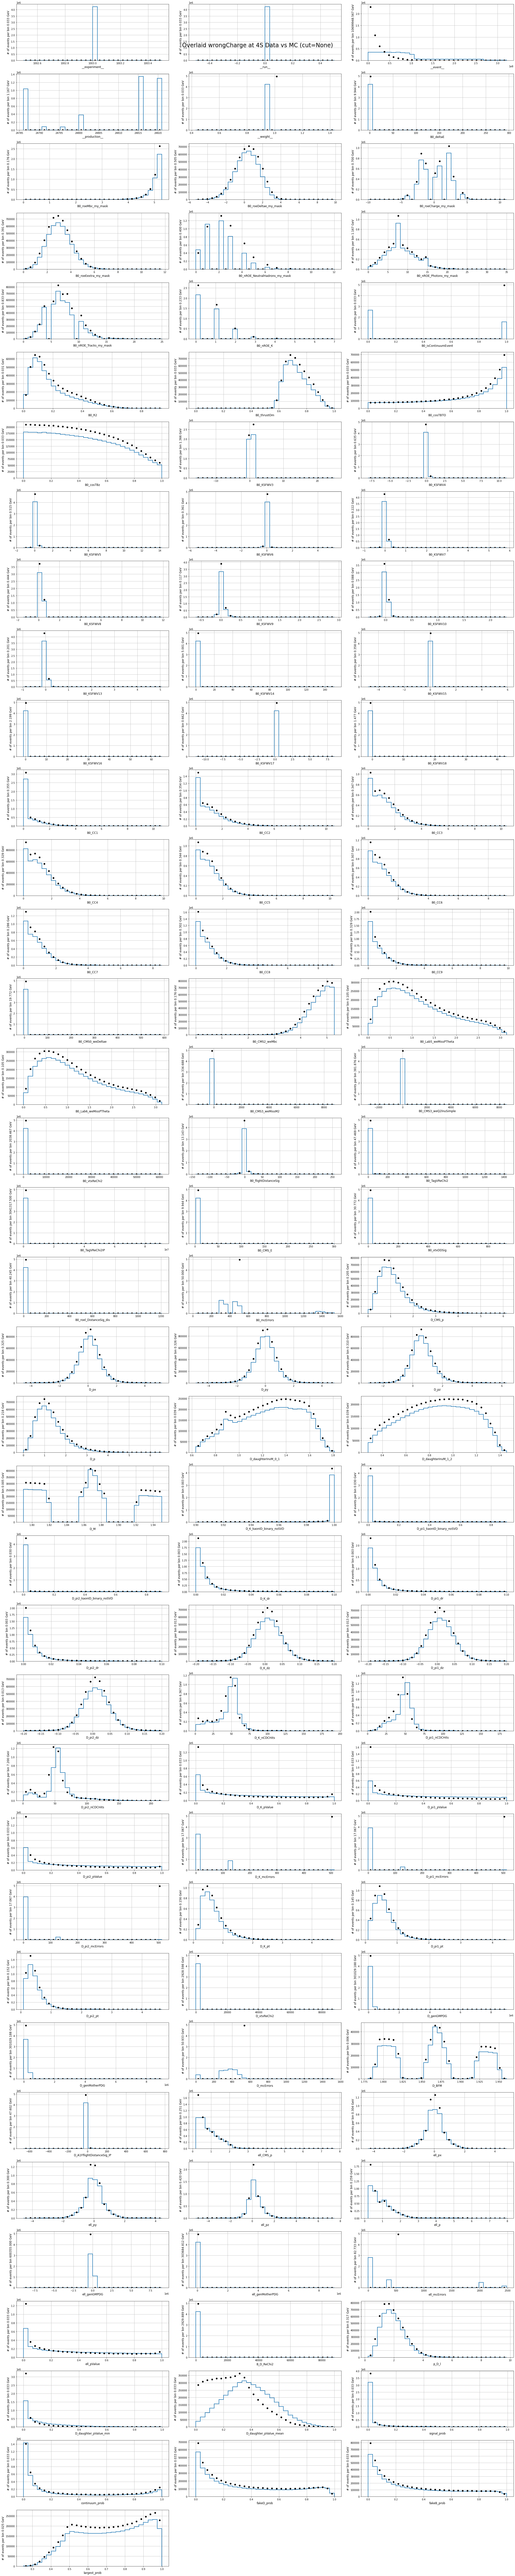

In [14]:
plot_data_mc(data=df_bestSelected_data, mc=df_bestSelected_mc, 
             bins=30,variables=columns_without_nan,cut=None,scale=[1.86/2,1],
            figsize=(30, 150), fontsize=12)

In [7]:
columns_without_nan = df_data_wc_BDT_sig.columns[~df_data_wc_BDT_sig.isna().any()].tolist()

samples_control=util.get_dataframe_samples_new(df_mc_wc_BDT_sig, 'e', template=False)
samples_sig = util.get_dataframe_samples_new(df_mc_cc_BDT_sig, 'e', template=False)
mpl=util.mpl(samples_control,df_data_wc_BDT_sig)
# df_conti_conti = samples['bkg_continuum']
for name, df in samples_control.items():
    print(name, len(df))

bkg_FakeD 15371
bkg_TDFl 326
bkg_fakeTracks 349
bkg_continuum 69
bkg_combinatorial 2480
bkg_singleBbkg 66
bkg_other_TDTl 0
$D\tau\nu$ 0
$D^\ast\tau\nu$ 0
$D\ell\nu$ 0
$D^\ast\ell\nu$ 0
$D^{\ast\ast}\tau\nu$ 0
$D^{\ast\ast}\ell\nu$ 0
$D\ell\nu$_gap 0
bkg_other_signal 0


In [6]:
columns_without_nan = df_data_wc_lgb.columns[~df_data_wc_lgb.isna().any()].tolist()

samples_control=util.get_dataframe_samples_new(df_mc_wc_lgb, 'e', template=False)
samples_sig = util.get_dataframe_samples_new(df_mc_cc_lgb, 'e', template=False)
mpl=util.mpl(samples_control,df_data_wc_lgb)
# df_conti_conti = samples['bkg_continuum']
for name, df in samples_control.items():
    print(name, len(df))

bkg_fakeD 3468
bkg_TDFl 605
bkg_fakeTracks 116
bkg_continuum 95
bkg_combinatorial 4996
bkg_singleBbkg 105
bkg_other_TDTl 0
$D\tau\nu$ 0
$D^\ast\tau\nu$ 0
$D\ell\nu$ 0
$D^\ast\ell\nu$ 0
$D^{\ast\ast}\tau\nu$ 0
$D^{\ast\ast}\ell\nu$_narrow 0
$D^{\ast\ast}\ell\nu$_broad 0
$D\ell\nu$_gap_pi 0
$D\ell\nu$_gap_eta 0
bkg_other_signal 0


# Check WC vs. CC

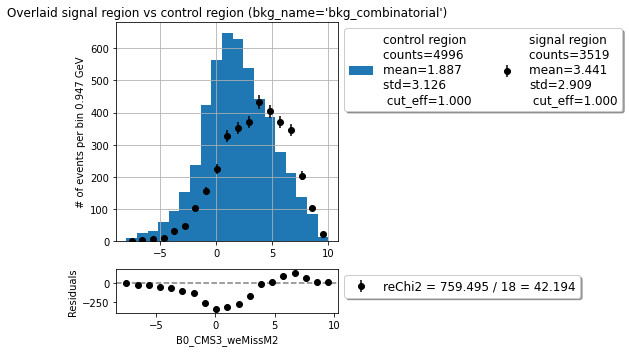

In [18]:
# compare control vs signal regions MC
b1 = np.linspace(-8,10,20)
scale = {'control region': 1,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_combinatorial',
                        cut=None,
                        samples_sig=samples_sig,
                        scale=scale,correction=False,mask=[])

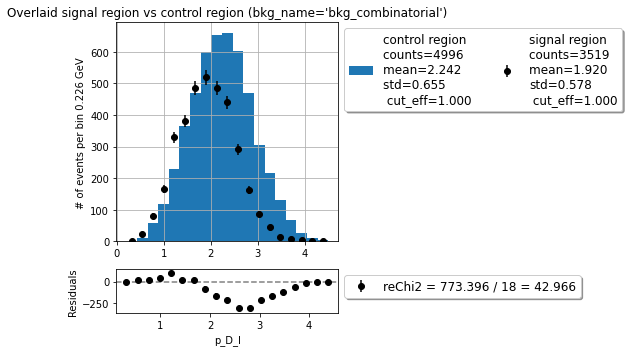

In [20]:
b2 = np.linspace(0.2,4.5,20)
scale = {'control region': 1,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,
                        bkg_name='bkg_combinatorial',cut=None,
                        samples_sig=samples_sig,
                        scale=scale,correction=False,mask=[])

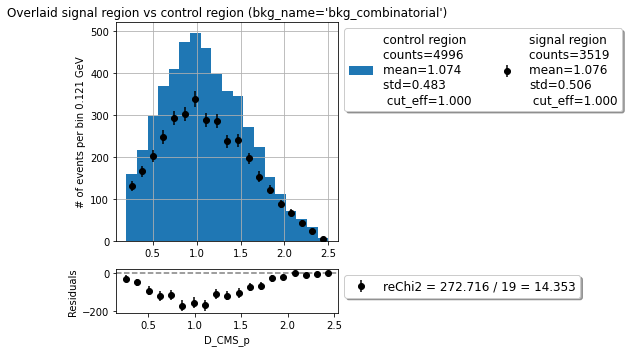

In [11]:
b2 = np.linspace(0.2,2.5,20)
scale = {'control region': 1,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='D_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut=None,
                        samples_sig=samples_sig,
                        scale=scale,correction=False,mask=[])

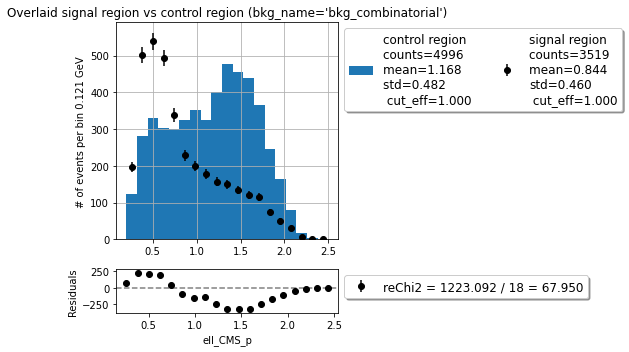

In [12]:
b2 = np.linspace(0.2,2.5,20)
scale = {'control region': 1,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='ell_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut=None,
                        samples_sig=samples_sig,
                        scale=scale,correction=False,mask=[])

In [13]:
print('Wrong charge sample')
samples_control['bkg_combinatorial'][['D_genMotherPDG','ell_genMotherPDG']].value_counts().head(25)

Wrong charge sample


D_genMotherPDG  ell_genMotherPDG
 511.0          -511.0              1064
-511.0           511.0              1026
-413.0          -511.0               474
 413.0           511.0               441
-521.0           521.0               232
 521.0          -521.0               200
 511.0          -411.0               102
-511.0           411.0                88
                -15.0                 86
-413.0          -521.0                77
 413.0           521.0                76
 511.0           15.0                 74
 413.0           411.0                59
-413.0          -411.0                53
-511.0           431.0                51
                 421.0                50
 511.0          -421.0                47
 413.0           421.0                45
                -15.0                 43
-413.0           15.0                 36
-425.0          -521.0                32
-413.0          -421.0                30
 521.0           421.0                30
 511.0          -431.0  

In [14]:
print('Correct charge sample')
samples_sig['bkg_combinatorial'][['D_genMotherPDG','ell_genMotherPDG']].value_counts().head(25)

Correct charge sample


D_genMotherPDG  ell_genMotherPDG
-511.0          -411.0              412
 511.0           411.0              387
-413.0           411.0              211
-511.0          -421.0              181
 511.0           421.0              179
                 511.0              157
 413.0          -411.0              152
-521.0           521.0              150
-511.0          -511.0              127
-413.0           421.0              115
                 511.0              114
 521.0          -521.0              113
 413.0          -511.0              112
                -421.0              101
 511.0          -511.0               97
-511.0           511.0               89
 413.0          -521.0               69
-413.0           521.0               61
-521.0          -421.0               60
 521.0           421.0               46
 511.0           4122.0              27
-511.0           22.0                23
                 15.0                21
 511.0           22.0                20
 413.0 

In [15]:
print(len(samples_control['bkg_combinatorial']), len(samples_sig['bkg_combinatorial']))

4996 3519


In [22]:
# 2 primary
print(samples_control['bkg_combinatorial'].query(
    '511<=abs(D_genMotherPDG)<=521 and 511<=abs(ell_genMotherPDG)<=521')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

# D primary, ell secondary
print(samples_control['bkg_combinatorial'].query(
    '511<=abs(D_genMotherPDG)<=521 and abs(ell_genMotherPDG)<511')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

# D sec, ell pri
print(samples_control['bkg_combinatorial'].query(
    'abs(D_genMotherPDG)<511 and 511<=abs(ell_genMotherPDG)<=521')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

# 2 secondary
print(samples_control['bkg_combinatorial'].query(
    'abs(D_genMotherPDG)<511 and abs(ell_genMotherPDG)<511')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

2545
367
791
1144


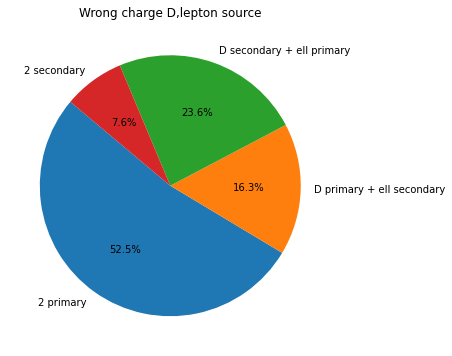

In [20]:
# Example data
sizes = [2545, 791, 1144, 367]  # Portion sizes for each component
labels = ['2 primary', 'D primary + ell secondary', 
          'D secondary + ell primary','2 secondary']  # Names of each component

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the size of the figure
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Wrong charge D,lepton source')
plt.show()

In [24]:
# 2 primary
print(samples_sig['bkg_combinatorial'].query(
    '511<=abs(D_genMotherPDG)<=521 and 511<=abs(ell_genMotherPDG)<=521')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

# D primary, ell secondary
print(samples_sig['bkg_combinatorial'].query(
    '511<=abs(D_genMotherPDG)<=521 and abs(ell_genMotherPDG)<511')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

# D sec, ell pri
print(samples_sig['bkg_combinatorial'].query(
    'abs(D_genMotherPDG)<511 and 511<=abs(ell_genMotherPDG)<=521')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

# 2 secondary
print(samples_sig['bkg_combinatorial'].query(
    'abs(D_genMotherPDG)<511 and abs(ell_genMotherPDG)<511')[
    ['D_genMotherPDG','ell_genMotherPDG']].value_counts().sum())

733
1516
359
720


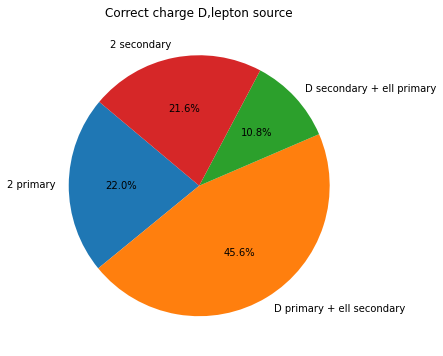

In [25]:
# Example data
sizes = [733, 1516, 359, 720]  # Portion sizes for each component
labels = ['2 primary', 'D primary + ell secondary', 
          'D secondary + ell primary','2 secondary']  # Names of each component

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the size of the figure
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Correct charge D,lepton source')
plt.show()

### Conclusion: Cannot use data driven for combinatorial bkg, WC and CC have different physics
#### Consider using MC template CC

# Check Data vs. MC

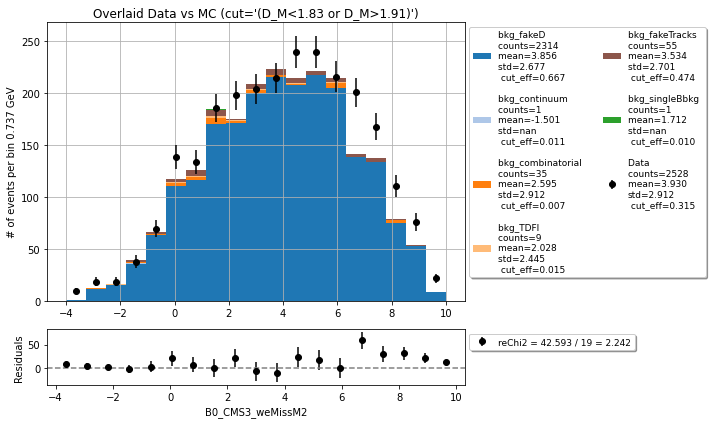

In [28]:
# sidebands
b1 = np.linspace(-4,10,20)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='(D_M<1.83 or D_M>1.91)',
                          scale=[1,187/200],correction=False,
                          mask=[],ratio=False,legend_fs=9)

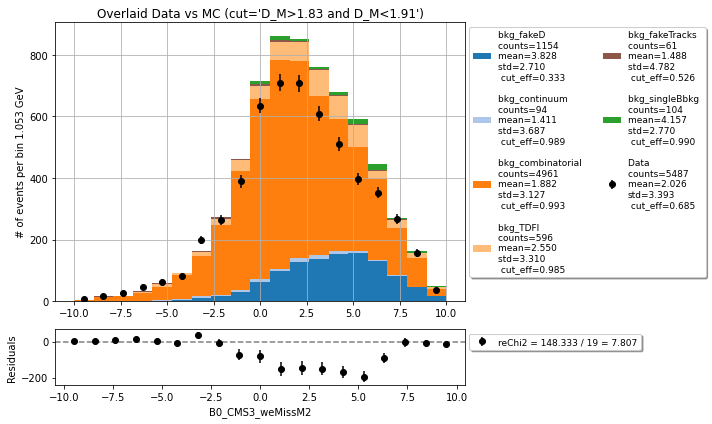

In [31]:
# signal region, without BDT
b1 = np.linspace(-10,10,20)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,ratio=False,
                          cut='D_M>1.83 and D_M<1.91',scale=[1,187/200],
                             correction=False,mask=[],figsize=(10,6),
                            legend_fs=9)

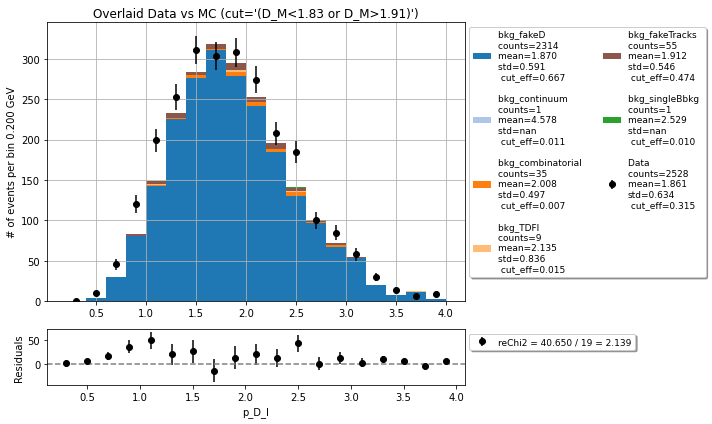

In [34]:
# sidebands
b2 = np.linspace(0.2,4,20)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='(D_M<1.83 or D_M>1.91)',legend_fs=9,
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6))

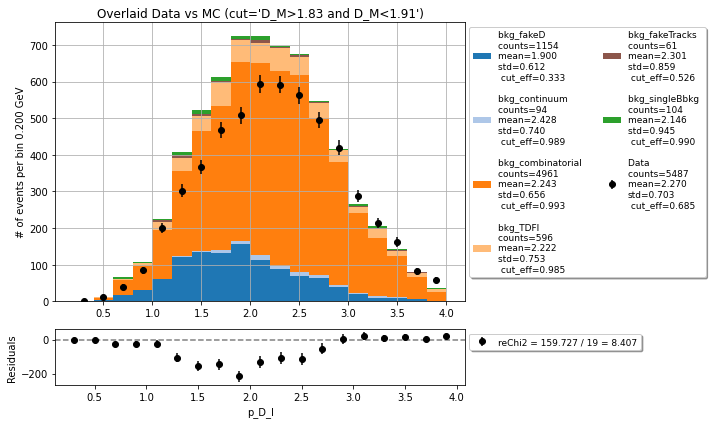

In [37]:
# signal
b2 = np.linspace(0.2,4,20)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='D_M>1.83 and D_M<1.91',scale=[1,187/200],
                             correction=False,mask=[],figsize=(10,6),
                            legend_fs=9)

# Create data driven template for FakeD
## 1. Calculate the sidebands to sig region scaling factors
### a. Histogram the D_M distribution

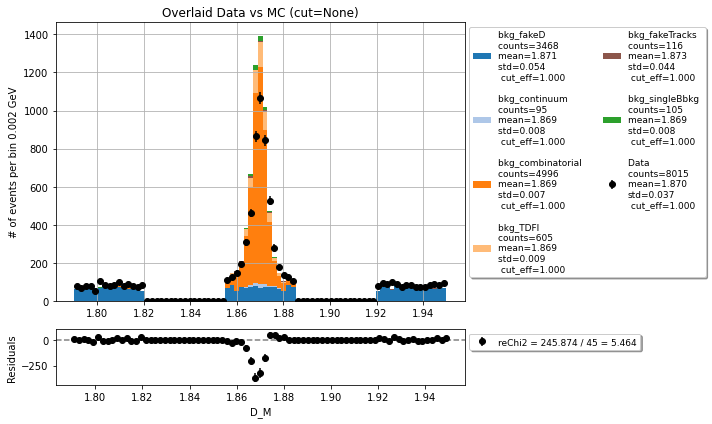

In [41]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,80)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut=None,scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,legend_fs=9)

### b. fit the FakeD with a polynomial

In [45]:
fitter = util.fit_iminuit(x_edges=b1, hist=data_hist_all, poly_only=True)

In [46]:
m_ls, c_ls, result_ls = fitter.fit_gauss_poly_LS(deg=1, loss='linear') #'soft_l1'
m_ls

initial parameters= [1.60e+00 1.87e+00 4.00e-02 2.22e+01 5.99e+01]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 40.43 (chi2/ndof = 1.5)    │              Nfcn = 70               │
│ EDM = 6.14e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.000   │   0.016   │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  40.0e-3  │  0.4e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │    40     │    26     │            │            │         │         │       │
│ 4 │ x4   │    10     │    50     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4 │
├────┼───────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0 │
│ x1 │         0         0         0         0         0 │
│ x2 │         0         0         0         0         0 │
│ x3 │         0         0         0       654 -1.22e+03 │
│ x4 │         0         0         0 -1.22e+03  2.29e+03 │
└────┴───────────────────────────────────────────────────┘

In [47]:
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [8.015e+02 1.870e+00 4.000e-02 8.015e+03 2.220e+01 6.000e+01]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 37.6 (chi2/ndof = 1.5)     │              Nfcn = 98               │
│ EDM = 3.7e-07 (Goal: 0.0002)     │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │     0     │     8     │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  40.0e-3  │  0.4e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  6.67e3   │  0.14e3   │            │            │         │         │       │
│ 4 │ x4   │     0     │   0.6e3   │            │            │         │         │       │
│ 5 │ x5   │  0.01e3   │  0.30e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │       x0       x1       x2       x3       x4       x5 │
├────┼───────────────────────────────────────────────────────┤
│ x0 │        0        0        0        0        0        0 │
│ x1 │        0        0        0        0        0        0 │
│ x2 │        0        0        0        0        0        0 │
│ x3 │        0        0        0 1.88e+04  -0.0127 -0.00677 │
│ x4 │        0        0        0  -0.0127 3.23e+05 1.68e+05 │
│ x5 │        0        0        0 -0.00677 1.68e+05  8.9e+04 │
└────┴───────────────────────────────────────────────────────┘

### c. Calculate the yield ratio

In [ ]:
area_left,error_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ls)
area_sig, error_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ls)
area_right,error_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ls)

In [48]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82: 1217.17
Yields from 1.855 to 1.885: 1251.116
Yields from 1.92 to 1.95: 1285.063


In [49]:
a = len(samples_control['bkg_fakeD'].query('1.79<D_M<1.82')) * 187/200
b = len(samples_control['bkg_fakeD'].query('1.92<D_M<1.95')) * 187/200
print('truth',a,b, a/b)

truth 1068.705 1094.885 0.9760888129803587


### d. Plot and compare MC of the weighted sideband and signal region

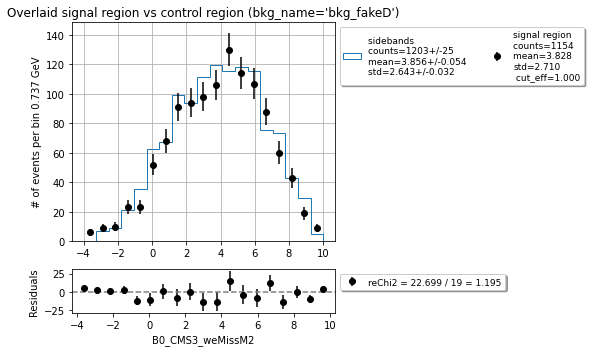

In [50]:
# showing the scaled sidebands vs. sig region from mc
b1 = np.linspace(-4,10,20)
scale = {'left sideband': yields_sig/yields_left/2,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_fakeD',cut=None,merge_sidebands=True,
                        scale=scale,correction=False,mask=[],legend_fs=9)

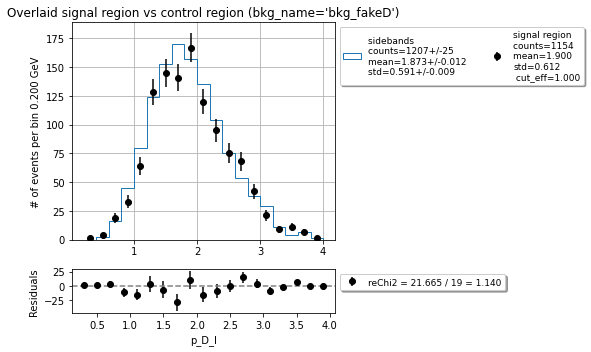

In [51]:
b2 = np.linspace(0.2,4,20)
scale = {'left sideband': yields_sig/yields_left/2,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2}
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,merge_sidebands=True,
                        bkg_name='bkg_fakeD',cut=None,
                        scale=scale,correction=False,mask=[],legend_fs=9)

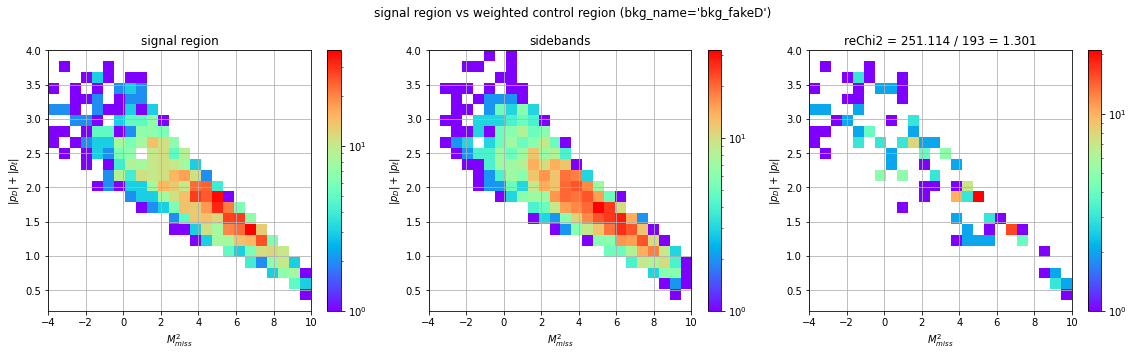

In [52]:
b1 = np.linspace(-4,10,25)
b2 = np.linspace(0.2,4,25)
scale = {'left sideband': yields_sig/yields_left/2,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2}
mpl.plot_mc_sig_control(variable=['B0_CMS3_weMissM2','p_D_l'],
                        bins=[b1,b2],
                        bkg_name='bkg_fakeD',cut=None,merge_sidebands=True,
                        scale=scale,correction=True,mask=[],figsize=(16,5))

## 2. Subtract the FakeD from the signal region

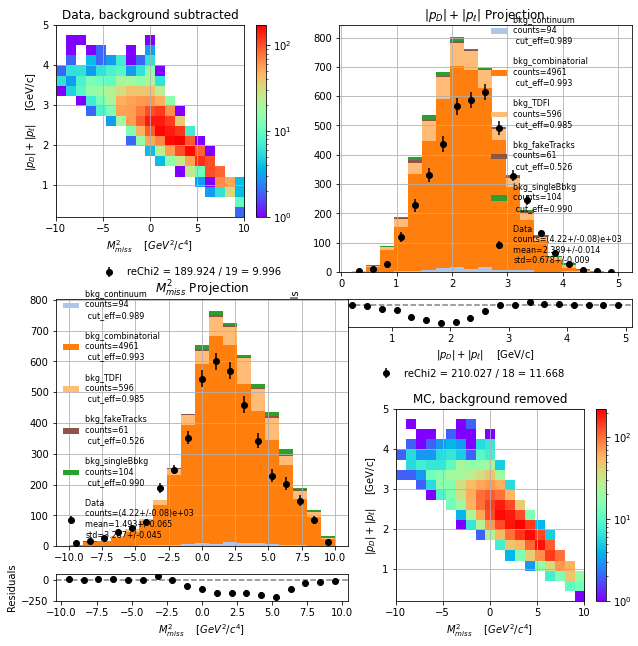

In [53]:
# BDT signal
b_mm2 = np.linspace(-10,10,20)
b_pDl = np.linspace(0.2,5,20)
scale = {'data left sideband': yields_sig/yields_left/2,
         'data signal region': 1,
         'data right sideband': yields_sig/yields_right/2,
         'mc signal region': 187/200}
par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': None, #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'scale': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
mpl.plot_data_subtracted_and_mc(**par_dict)

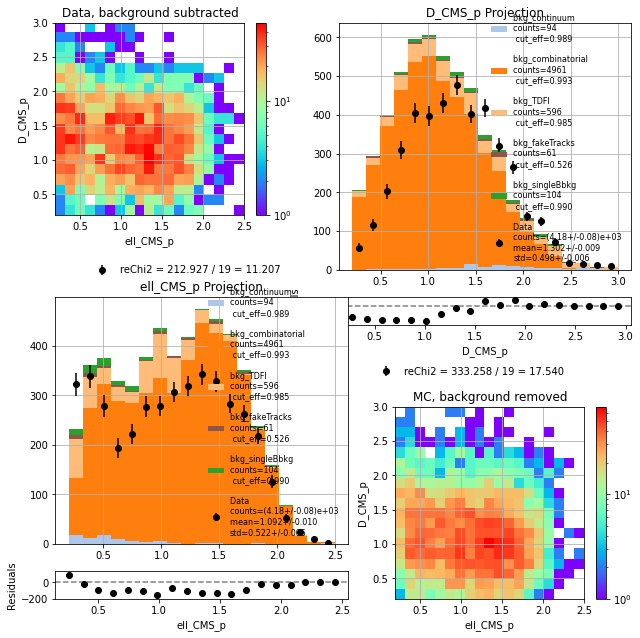

In [55]:
# BDT signal, pl; pd
b_mm2 = np.linspace(0.2,2.5,20)
b_pDl = np.linspace(0.2,3,20)
scale = {'data left sideband': yields_sig/yields_left/2,
         'data signal region': 1,
         'data right sideband': yields_sig/yields_right/2,
         'mc signal region': 187/200}
par_dict={'var_list':['ell_CMS_p','D_CMS_p'],
          'bin_list': [b_mm2, b_pDl],
          'cut': None,
          'scale': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
mpl.plot_data_subtracted_and_mc(**par_dict)

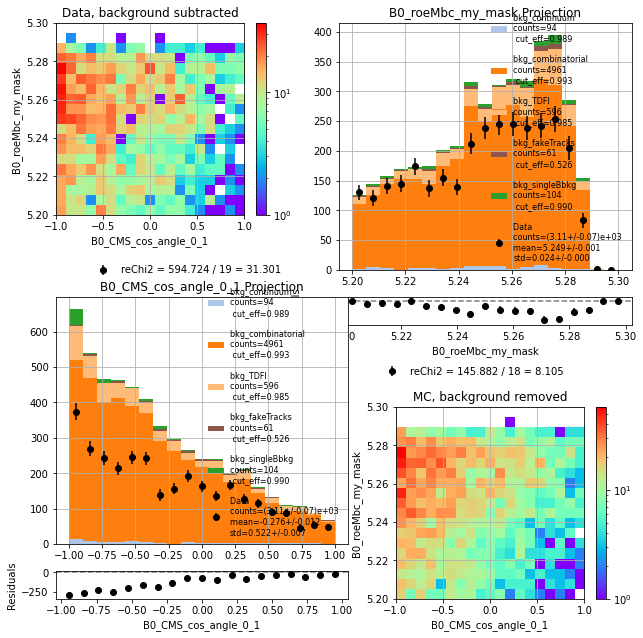

In [59]:
# BDT signal, pl; pd
b_mm2 = np.linspace(-1,1,20)
b_pDl = np.linspace(5.2,5.3,20)
scale = {'data left sideband': yields_sig/yields_left/2,
         'data signal region': 1,
         'data right sideband': yields_sig/yields_right/2,
         'mc signal region': 187/200}
par_dict={'var_list':['B0_CMS_cos_angle_0_1','B0_roeMbc_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask>5.2',
          'scale': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
mpl.plot_data_subtracted_and_mc(**par_dict)